<a href="https://colab.research.google.com/github/UttaraKet1607/Covid19-Detection-Using-CNN/blob/main/Covid_19_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Covid-19 Detection using chest X-rays

[Download dataset ](https://www.kaggle.com/mr3suvhro/covid-19-xray-image-dataset-with-huge-samples?select=COVID )

### 1) Specifying file path for test and train directories

In [ ]:
TRAIN_PATH='Path to training directory'
TEST_PATH='Path to test directory'
class_names=["COVID-19","Normal"]

### 2) Importing required libraries 
##### libraries required for visualizations, augmentation and deep learning

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from PIL import Image
import os

import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from tensorflow.keras import callbacks

### 3) Loading in the dataset and performing augmentation
##### ImageDataGenerator - ImageDataGenerator generates batches of image data with real-time data augmentation
##### flow_from_directory - Takes the path to a directory & generates batches of augmented data 

In [ ]:
generator = image.ImageDataGenerator(rescale=1./255, rotation_range=40,       
      width_shift_range=0.2,   
      height_shift_range=0.2,  
      shear_range=0.2,         
      zoom_range=0.2,           
      horizontal_flip=True,    
      fill_mode="nearest")

train_datagen = generator.flow_from_directory(TRAIN_PATH,target_size=(150,150),classes=class_names,class_mode='binary',batch_size=20)
test_datagen = generator.flow_from_directory(TEST_PATH,target_size=(150,150),classes=class_names,class_mode='binary',batch_size=20)

Found 2000 images belonging to 2 classes.
Found 328 images belonging to 2 classes.


### 4) Visualizing data and associated labels

6
Normal


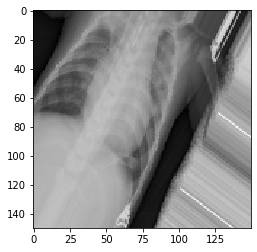

In [ ]:
i = int(input())
plt.imshow(train_datagen[0][0][i])
print(class_names[int(train_datagen[0][1][i])])

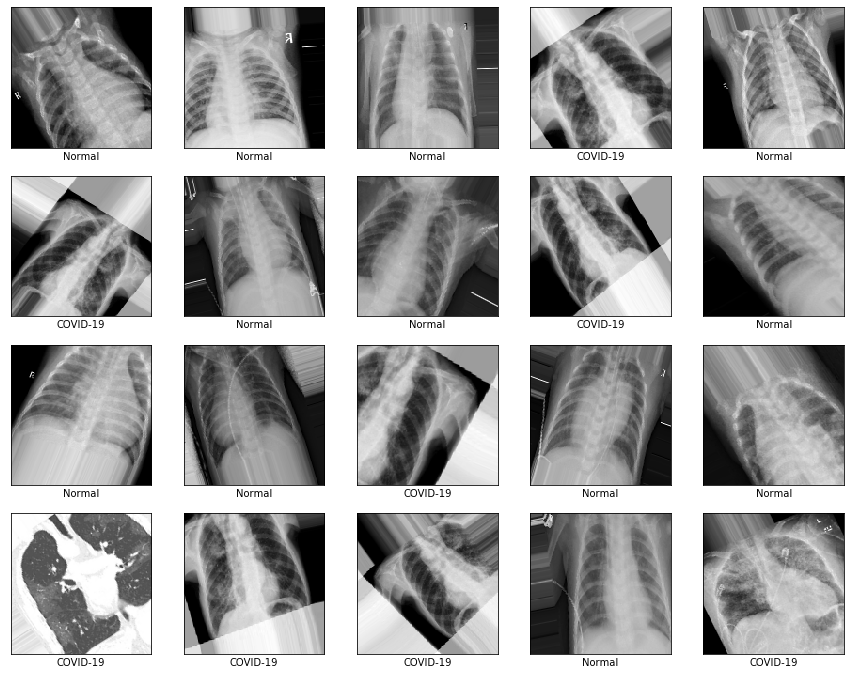

In [ ]:
plt.figure(figsize=(15,15))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_datagen[0][0][i], cmap=plt.cm.binary)
    plt.xlabel(class_names[int(train_datagen[0][1][i])])
plt.show()

### 5) CNN sequential model
##### layered architechture 

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape= (150,150,3)))
model.add(Conv2D(32,(3,3),activation='relu',input_shape= (150,150,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',input_shape= (150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu',input_shape= (150,150,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',input_shape= (150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu',input_shape= (150,150,3)))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 69, 69, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 64)       

### 6) Model training followed by evaluation

In [ ]:
model.compile(optimizer=RMSprop(lr=0.001),loss='binary_crossentropy',metrics = ['accuracy'])

In [ ]:
history = model.fit(train_datagen,epochs = 30)

  ...
    to  
  ['...']
Train for 100 steps
Epoch 1/30
100/100 [==============================] - 153s 2s/step - loss: 0.7317 - accuracy: 0.6150
Epoch 2/30
100/100 [==============================] - 123s 1s/step - loss: 0.4673 - accuracy: 0.8210
Epoch 3/30
100/100 [==============================] - 125s 1s/step - loss: 0.4937 - accuracy: 0.8660
Epoch 4/30
100/100 [==============================] - 121s 1s/step - loss: 0.2792 - accuracy: 0.8920
Epoch 5/30
100/100 [==============================] - 127s 1s/step - loss: 0.3176 - accuracy: 0.9025
Epoch 6/30
100/100 [==============================] - 128s 1s/step - loss: 0.2634 - accuracy: 0.9125
Epoch 7/30
100/100 [==============================] - 128s 1s/step - loss: 0.2570 - accuracy: 0.9075
Epoch 8/30
100/100 [==============================] - 143s 1s/step - loss: 0.2198 - accuracy: 0.9255
Epoch 9/30
100/100 [==============================] - 144s 1s/step - loss: 0.1967 - accuracy: 0.9310
Epoch 10/30
100/100 [=========================

### We are getting training accuracy of 95.8%

### 7) Graphical representation of results of model

#### The learning rate controls how quickly the model is adapted to the problem. 

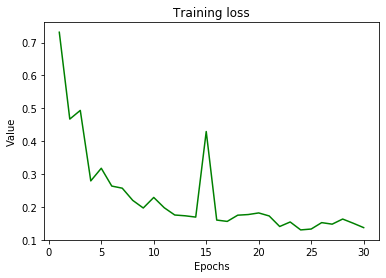

In [ ]:
loss_train = history.history['loss']
epochs = range(1,31)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.show()

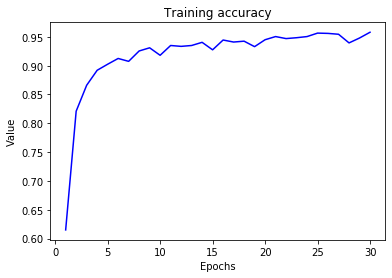

In [ ]:
accuracy_train = history.history['accuracy']
epochs = range(1,31)
plt.plot(epochs, accuracy_train, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.show()

In [ ]:
model.evaluate(test_datagen)

  ...
    to  
  ['...']
17/17 [==============================] - 10s 597ms/step - loss: 0.1372 - accuracy: 0.9512


[0.13720344316543026, 0.9512195]

### We are getting testing accuracy of 95.12%